In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

import matplotlib.pyplot as plt  # To visualize
import json
from collections import Counter, defaultdict
from itertools import chain
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings('ignore')

from itertools import chain
import scipy.stats

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
df = pd.read_csv("../data/aff+conc/phone_aff_conc.csv")

In [24]:
langs = list(set(df["LANG_PRON"]))

In [4]:
df_langs = pd.read_csv("../data/aff+conc/languages_#phone.csv")

In [13]:
df_langs[df_langs["isocodes"]=="zha"]

,glottocode,name,isocodes,level,macroarea,latitude,longitude,higher_lang,#Phonemes,#Concepts


In [27]:
len(langs)

142

In [16]:
lang2macroarea= dict(zip(df_langs["isocodes"], df_langs["macroarea"]))

In [17]:
lang2macroarea2= dict(zip(df_langs["higher_lang"], df_langs["macroarea"]))

In [29]:
lang2macroarea["zha"]="Eurasia"
lang2macroarea["srd"]="Eurasia"

In [32]:
lang2macroarea["ita"]

'Eurasia'

In [18]:
lang2macroarea.update(lang2macroarea2)

In [26]:
len(lang2macroarea)

215

In [33]:
df["macroarae"]= df["LANG_PRON"].parallel_apply(lambda x: lang2macroarea[x])

In [146]:
df["PRON_LEN"]= df["PRON"].apply(lambda x: len(x.split(" ")))

In [148]:
df["PRON_LEN"].max()

38

<Axes: xlabel='PRON_LEN', ylabel='Count'>

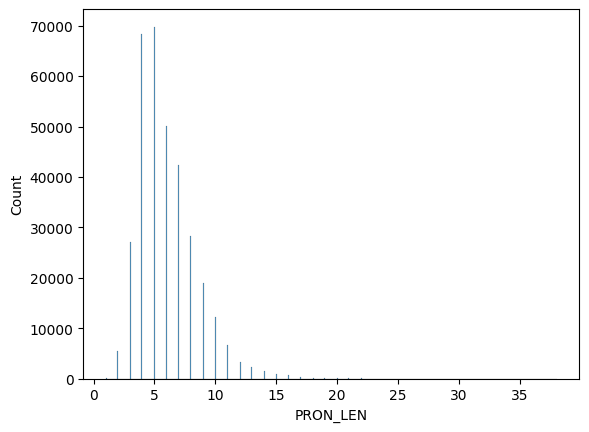

In [149]:
sns.histplot(data= df, x="PRON_LEN")

In [156]:
df

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae,Conc.CLASS,V.CLASS,A.CLASS,D.CLASS,PRON_LEN
0,a,eng,ə,alpha~settling,2.035,1.230,5.500,2.240,3.670,2.630,6.320,2.480,5.163333,0.490352,Eurasia,0.0,1.0,0.0,2.0,1
1,a,hun,ɒː,amplitude~elevator,3.855,0.985,5.950,1.500,3.650,2.250,4.920,2.260,4.840000,0.654389,Eurasia,1.0,1.0,0.0,1.0,1
2,a,hun,ɒː,amplitude~legislature,2.730,1.360,3.550,1.570,3.220,2.180,4.480,1.990,3.750000,0.481333,Eurasia,0.0,0.0,0.0,1.0,1
3,a,hun,ɒː,amplitude~menopause,3.055,1.405,1.890,1.020,3.550,2.240,4.320,2.810,3.253333,0.486241,Eurasia,1.0,0.0,0.0,1.0,1
4,a,hun,ɒː,amplitude~movie,3.755,1.185,7.240,1.510,4.390,2.630,5.680,2.160,5.770000,0.696056,Eurasia,1.0,2.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339687,𐌿𐍂𐍂𐌿𐌽𐍃,got,u r r u n s,dawn~departure,3.765,1.170,5.395,1.750,3.375,2.535,5.035,2.615,4.601667,0.632148,Eurasia,1.0,1.0,0.0,1.0,6
339688,𐍃𐌺𐌴𐌹𐌼𐌰,got,s k iː m a,lantern~torch,4.880,0.320,4.935,1.700,4.165,2.195,5.550,2.160,4.883333,0.759296,Eurasia,2.0,1.0,1.0,1.0,5
339689,𐍅𐌰𐌹𐌽𐌰𐌷𐍃,got,w ɛː n a h s,miserable~unhappy,2.005,1.320,2.220,1.485,5.080,2.720,3.785,2.170,3.695000,0.405778,Eurasia,0.0,0.0,2.0,0.0,6
339690,𐍅𐍉𐌸𐌴𐌹𐍃,got,w oː θ iː s,pleasant~sweet,2.775,1.020,7.505,1.445,3.525,2.720,6.410,1.965,5.813333,0.600463,Eurasia,0.0,2.0,0.0,2.0,5


In [155]:
df[df["PRON_LEN"]>25]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae,Conc.CLASS,V.CLASS,A.CLASS,D.CLASS,PRON_LEN
315392,นักมานุษยวิทยา,tha,n a k̚ ˦˥ m aː ˧ n u t̚ ˦˥ s a ˨˩ j a ˦˥ w i t...,anthropologist~anthropology,3.205,1.450,5.500,1.545,3.090,2.240,5.595,2.220,4.728333,0.583185,Eurasia,1.0,1.0,0.0,1.0,27
320331,三角法,cmn,s ä n ⁵ ⁵ t͡ɕ j ɑ ʊ̯ ² ¹ ⁴ ⁻ ³ ⁵ f ä ² ¹ ⁴ ⁻ ²...,trigonometric~trigonometry,2.980,1.430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eurasia,0.0,NaN,NaN,NaN,26
320576,世界末日,cmn,ʂ ʐ̩ ⁵ ¹ ⁻ ⁵ ³ t͡ɕ j ɛ ⁵ ¹ ⁻ ⁵ ³ m w ɔ ⁵ ¹ ⁻ ⁵...,armageddon~apocalypse,2.555,1.485,3.240,2.340,5.040,2.900,2.650,1.950,3.643333,0.457907,Eurasia,0.0,0.0,2.0,0.0,26
320577,世界末日,cmn,ʂ ʐ̩ ⁵ ¹ ⁻ ⁵ ³ t͡ɕ j ɛ ⁵ ¹ ⁻ ⁵ ³ m w ɔ ⁵ ¹ ⁻ ⁵...,armageddon~judgment_day,2.575,1.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eurasia,0.0,NaN,NaN,NaN,26
320578,世界末日,cmn,ʂ ʐ̩ ⁵ ¹ ⁻ ⁵ ³ t͡ɕ j ɛ ⁵ ¹ ⁻ ⁵ ³ m w ɔ ⁵ ¹ ⁻ ⁵...,judgment_day~apocalypse,2.230,1.425,3.240,2.340,5.040,2.900,2.650,1.950,3.643333,0.425407,Eurasia,0.0,0.0,2.0,0.0,26
320681,乳房攝影,cmn,ʐ u ² ¹ ⁴ ⁻ ² ¹ ¹ f ɑ ŋ ³ ⁵ ʂ ɤ ⁵ ¹ i ŋ ² ¹ ⁴ ...,mammogram~mammography,4.250,1.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eurasia,2.0,NaN,NaN,NaN,29
320684,乳脂軟糖,cmn,ʐ u ² ¹ ⁴ ⁻ ² ¹ ¹ ʈ͡ʂ ʐ̩ ⁵ ⁵ ʐ w ä n ² ¹ ⁴ ⁻ ²...,brittle~fudge,4.225,0.845,5.740,1.535,4.665,2.425,5.180,2.315,5.195000,0.711111,Eurasia,2.0,1.0,1.0,1.0,29
320687,了不起,cmn,l j ɑ ʊ̯ ² ¹ ⁴ ⁻ ² ¹ ¹ p u ⁵ ¹ t͡ɕʰ i ² ¹ ⁴ ⁻ ...,amazing~extraordinary,1.840,1.015,7.585,1.355,5.135,2.420,6.840,2.040,6.520000,0.546222,Eurasia,0.0,2.0,2.0,2.0,26
320702,二氧化碳,cmn,ˀɤ ɻ ⁵ ¹ j ɑ ŋ ² ¹ ⁴ ⁻ ² ¹ ¹ x w ä ⁵ ¹ ⁻ ⁵ ³ t...,carbon_dioxide~dioxide,3.390,1.445,4.580,1.500,3.950,2.440,4.710,2.120,4.413333,0.584185,Eurasia,1.0,1.0,0.0,1.0,27
320732,交響樂團,cmn,t͡ɕ j ɑ ʊ̯ ⁵ ⁵ ɕ j ɑ ŋ ² ¹ ⁴ ⁻ ² ¹ ¹ ɥ ɛ ⁵ ¹ t...,orchestra~symphony_orchestra,4.735,0.695,6.500,1.870,4.070,2.630,5.760,2.240,5.443333,0.775907,Eurasia,2.0,2.0,1.0,1.0,27


In [136]:
def conc2class(conc):
    if conc<3:
        return 0
    elif conc>=3 and conc<=4:
        return 1
    elif conc>4:
        return 2
    else:
        return np.NaN

In [125]:
def V2class(v):
    if v<4:
        return 0
    elif v>=4 and v<=6:
        return 1
    elif v>6:
        return 2
    else:
        return np.NaN
    
def D2class(d):
    if d<4:
        return 0
    elif d>=4 and d<=6:
        return 1
    elif d>6:
        return 2
    else:
        return np.NaN
    
    
def A2class(a):
    if a<4:
        return 0
    elif a>=4 and a<=5:
        return 1
    elif a>5:
        return 2
    else:
        return np.NaN
    

In [137]:
df["Conc.CLASS"]= df["Conc.Mean"].parallel_apply(conc2class)
df["V.CLASS"]= df["V.Mean"].parallel_apply(V2class)
df["A.CLASS"]= df["A.Mean"].parallel_apply(A2class)
df["D.CLASS"]= df["D.Mean"].parallel_apply(D2class)

In [144]:
df.to_csv("../data/aff+conc/phone_aff_conc_classes.csv", index=False)

In [134]:
df[df["Conc.Mean"]>=4][df["LANG_PRON"]=="eng"]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae,Conc.CLASS,V.CLASS,A.CLASS,D.CLASS
1066,abode,eng,ə b ə ʊ d,dwelling~residence,4.240,1.250,5.975,1.710,3.370,2.185,5.410,2.385,4.918333,0.697241,Eurasia,2.0,1.0,0.0,1.0
1643,academy,eng,ə k æ d ə m i,academy~school,4.540,0.845,5.365,2.075,4.170,2.260,5.630,2.050,5.055000,0.734833,Eurasia,2.0,1.0,1.0,1.0
2544,acre,eng,ɑː k ɹ ə,acre~field,4.220,1.120,5.630,1.825,3.285,1.960,5.340,2.265,4.751667,0.685981,Eurasia,2.0,1.0,0.0,1.0
2689,actor,eng,a k t ə,actor~defendant,4.185,1.110,5.100,1.390,4.245,2.355,4.795,2.225,4.713333,0.680352,Eurasia,2.0,1.0,1.0,1.0
2693,actress,eng,æ k t ɹ ɪ s,actor~actress,4.555,0.870,5.785,1.245,4.890,2.230,5.145,2.195,5.273333,0.748463,Eurasia,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275642,yellow,eng,j ɛ l ə ʊ,blond~jaundiced,4.125,1.185,6.080,1.950,3.000,2.250,5.380,2.160,4.820000,0.680278,Eurasia,2.0,2.0,0.0,1.0
275643,yellow,eng,j ɛ l ə ʊ,blond~yellow,4.355,1.090,6.085,1.885,3.415,2.290,5.865,2.410,5.121667,0.720037,Eurasia,2.0,2.0,0.0,1.0
275645,yellow,eng,j ɛ l ə ʊ,chicken~jaundiced,4.320,0.900,6.170,1.860,3.200,2.570,5.220,1.990,4.863333,0.702185,Eurasia,2.0,2.0,0.0,1.0
275646,yellow,eng,j ɛ l ə ʊ,chicken~yellow,4.550,0.805,6.130,1.840,3.515,2.450,5.785,2.325,5.143333,0.740741,Eurasia,2.0,2.0,0.0,1.0


In [48]:
df[df["Conc.Mean"]<=3][df["LANG_PRON"]=="eng"].sample(10)

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
94383,expression,eng,ɪ k s p ɹ ɛ ʃ ə n,expression~phrase,2.700,1.440,5.825,1.740,3.665,2.260,6.000,1.915,5.163333,0.556852,Eurasia
146454,large,eng,l ɑː d͡ʒ,ample~boastfully,2.420,1.225,5.890,2.210,3.280,2.140,6.040,2.180,5.070000,0.523667,Eurasia
88346,enchanter,eng,ɪ n t ʃ ɑː n t ə,enchanter~magic,2.795,1.375,7.170,1.890,6.050,2.640,5.330,2.470,6.183333,0.623019,Eurasia
128810,invasive,eng,ɪ n v e ɪ s ɪ v,cancer~incursive,2.810,1.130,1.900,1.840,5.140,2.870,2.900,2.190,3.313333,0.465074,Eurasia
46995,bragging,eng,b ɹ a ɡ ɪ ŋ,boastful~brag,2.445,1.105,4.050,1.360,3.500,2.190,5.320,1.890,4.290000,0.482833,Eurasia
203126,procure,eng,p ɹ ə k j ʊ ə,obtain~procure,2.615,1.495,5.265,1.945,3.960,2.515,6.060,1.840,5.095000,0.544556,Eurasia
246039,tale,eng,t e ɪ l,fib~narrative,2.825,1.475,4.735,1.550,4.415,2.035,5.145,2.330,4.765000,0.547222,Eurasia
94188,expensive,eng,ɪ k s p ɛ n s ɪ v,cost~expensive,2.815,1.280,3.735,1.980,5.500,2.575,4.940,2.255,4.725000,0.544000,Eurasia
263998,v,eng,v iː,five~value,2.745,1.180,6.290,1.205,4.670,2.130,5.945,2.215,5.635000,0.587556,Eurasia
157096,make,eng,m e ɪ k,construct~seduce,2.390,1.305,6.070,1.645,5.280,2.255,5.770,2.595,5.706667,0.556037,Eurasia


In [49]:
df[(df["Conc.Mean"]<4) & (df["Conc.Mean"]>3)][df["LANG_PRON"]=="eng"].sample(10)

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
76549,detainee,eng,d ɪ t e ɪ n iː,detainee~prisoner,3.935,1.175,2.670,1.680,5.000,2.320,2.410,2.000,3.360000,0.580167,Eurasia
211369,recoil,eng,ɹ ɪ k ɔ ɪ l,flinch~recoil,3.570,1.340,4.400,1.680,4.955,2.275,4.215,2.235,4.523333,0.608296,Eurasia
226025,secrete,eng,s ɪ k ɹ iː t,hide~secrete,3.625,1.200,4.900,1.530,3.520,2.240,4.850,2.220,4.423333,0.608241,Eurasia
97384,feature,eng,f iː t͡ʃ ə ɹ,feature~sport,3.220,1.425,6.275,1.675,4.305,2.290,6.235,1.945,5.605000,0.633389,Eurasia
275134,writing,eng,ɹ a ɪ t ɪ ŋ,orthography~writing,3.215,1.475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eurasia
269730,violate,eng,v a ɪ ə l e ɪ t,desecrate~rape,3.085,1.370,2.295,1.395,5.680,2.375,3.285,2.145,3.753333,0.517019,Eurasia
157109,make,eng,m e ɪ k,reach~shuffle,3.765,1.360,5.250,1.230,3.400,2.265,5.320,1.930,4.656667,0.635204,Eurasia
229448,share,eng,ʃ ɛ ə,share~stock,3.575,1.060,5.860,1.950,3.350,2.335,5.530,2.255,4.913333,0.630463,Eurasia
197109,plump,eng,p l ʌ m p,fatten~plump,3.615,1.295,4.420,1.460,3.910,1.890,4.935,2.245,4.421667,0.607148,Eurasia
228408,series,eng,s ɪ ə ɹ iː z,serial~television_program,3.405,1.320,3.450,1.670,4.330,2.000,5.860,2.140,4.546667,0.593093,Eurasia


<Axes: xlabel='A.Mean', ylabel='Count'>

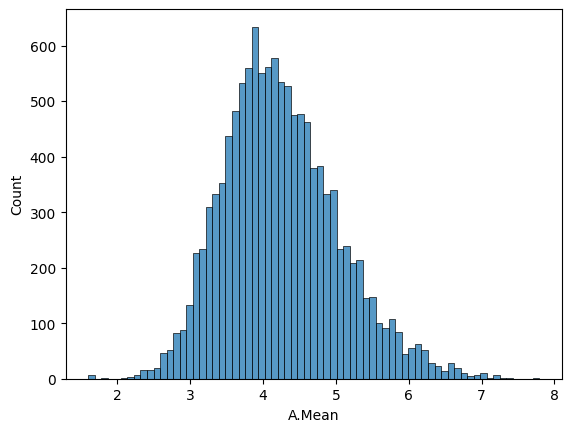

In [72]:
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="A.Mean")

<Axes: xlabel='Conc.CLASS', ylabel='Count'>

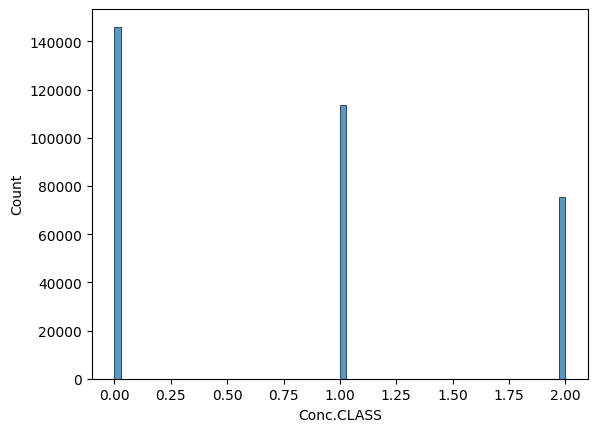

In [140]:
sns.histplot(data=df, x ="Conc.CLASS")

<Axes: xlabel='A.CLASS', ylabel='Count'>

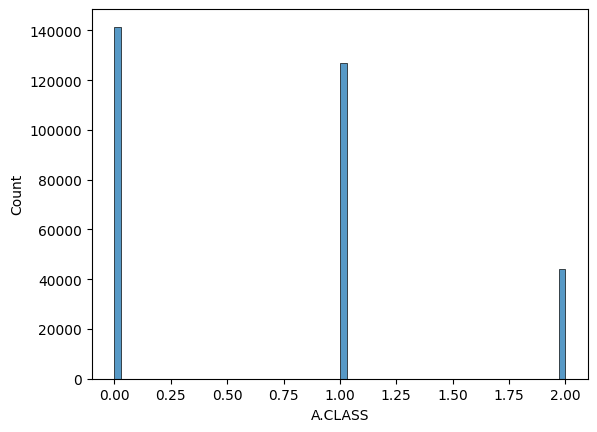

In [141]:
sns.histplot(data=df, x ="A.CLASS")

<Axes: xlabel='Conc.CLASS', ylabel='Count'>

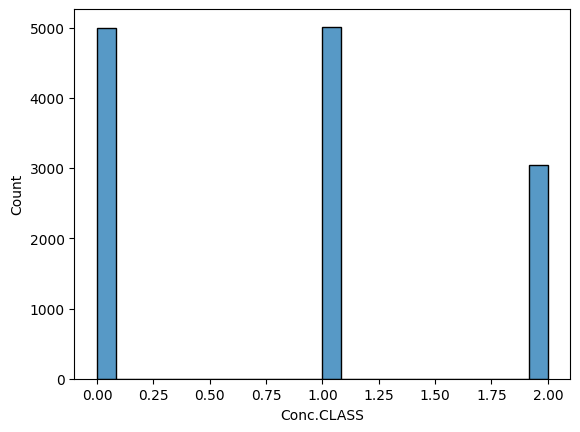

In [138]:
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="Conc.CLASS")

<Axes: xlabel='A.CLASS', ylabel='Count'>

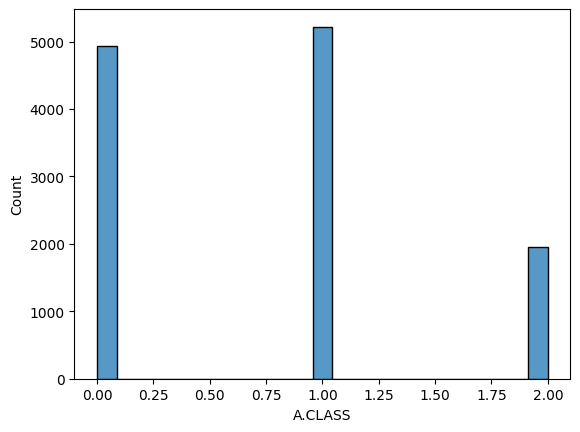

In [127]:
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="A.CLASS")

<Axes: xlabel='D.CLASS', ylabel='Count'>

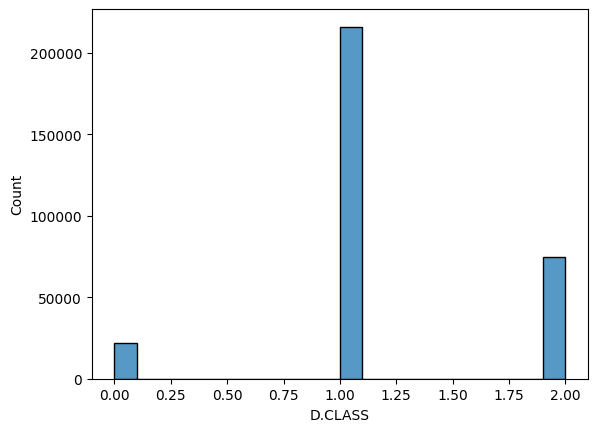

In [142]:
sns.histplot(data=df, x ="D.CLASS")

<Axes: xlabel='D.CLASS', ylabel='Count'>

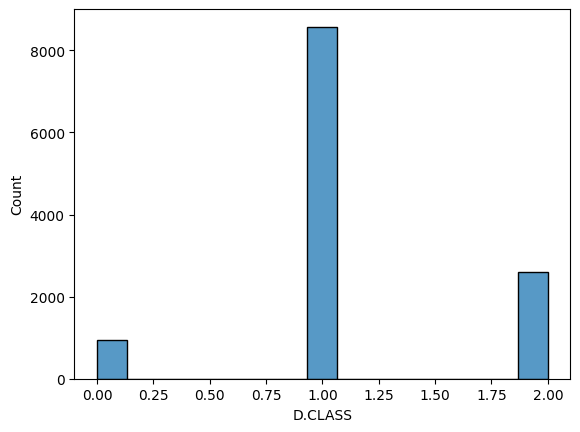

In [128]:
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="D.CLASS")

<Axes: xlabel='V.CLASS', ylabel='Count'>

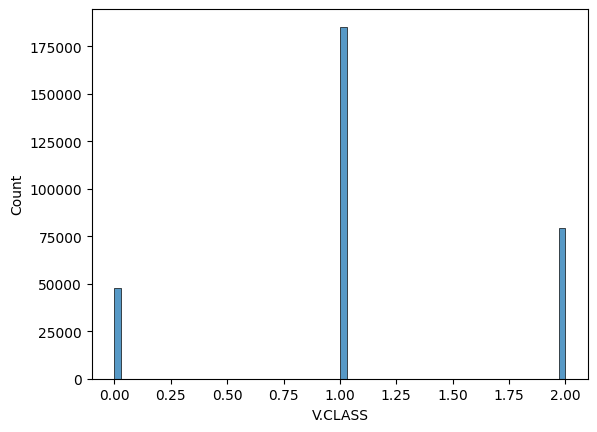

In [143]:
sns.histplot(data=df, x ="V.CLASS")


<Axes: xlabel='V.CLASS', ylabel='Count'>

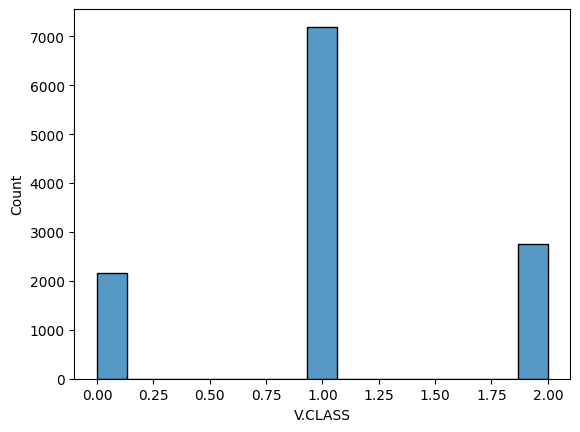

In [129]:
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="V.CLASS")

<Axes: xlabel='V.Mean', ylabel='Count'>

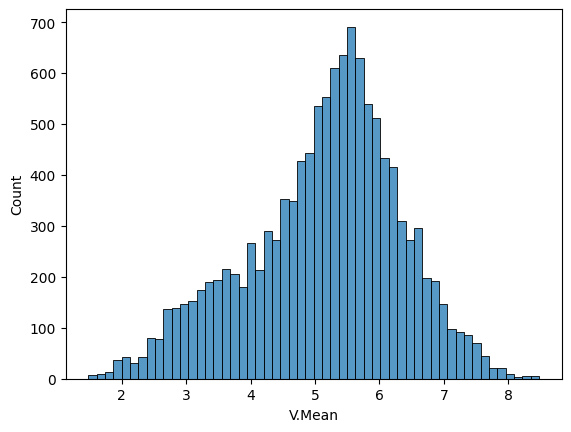

In [70]:
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="V.Mean")

<Axes: xlabel='D.Mean', ylabel='Count'>

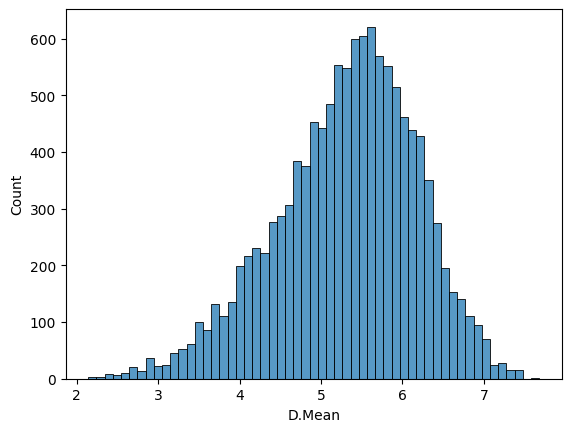

In [73]:
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="D.Mean")

<Axes: xlabel='Aff.Mean', ylabel='Count'>

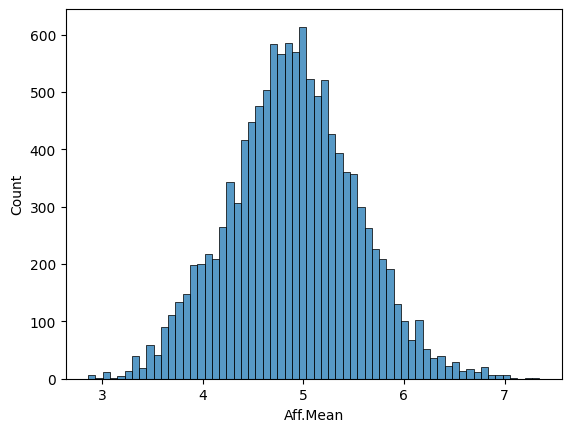

In [69]:
# discretize conc.Mean
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="Aff.Mean")

<Axes: xlabel='Conc.Mean', ylabel='Count'>

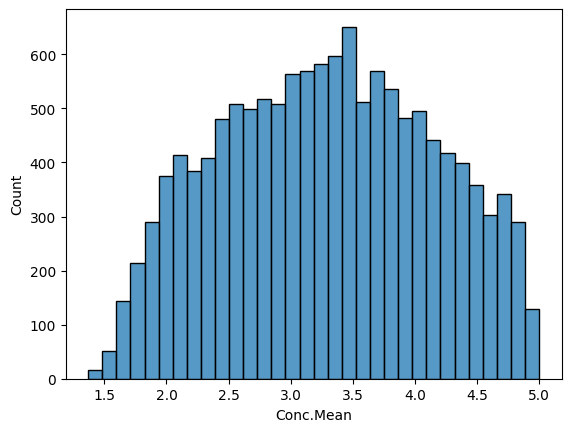

In [51]:
sns.histplot(data=df[df["LANG_PRON"]=="eng"], x ="Conc.Mean")

In [52]:
count = len(df[df["LANG_PRON"]=="eng"])

In [53]:
count

13226

In [56]:
df_eng = df[df["LANG_PRON"]=="eng"].dropna(subset=["Conc.Mean"])

In [75]:
df_eng = df[df["LANG_PRON"]=="eng"].dropna(subset=["V.Mean"])

In [76]:
len(df_eng)/3

4037.6666666666665

In [78]:
df_eng=df_eng.sort_values(by="V.Mean", ascending=True)

In [102]:
df_eng[df_eng["A.Mean"]<=3]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
78985,dispirited,eng,d ɪ s p ɪ ɹ ɪ t ə d,dispirited~sadness,2.100,1.220,2.400,1.100,2.810,2.250,3.840,2.79,3.016667,0.377593,Eurasia
220806,sadly,eng,s a d l i,sadness~unfortunately,1.720,0.920,2.400,1.100,2.810,2.250,3.840,2.79,3.016667,0.339593,Eurasia
220804,sadly,eng,s a d l i,deplorably~sadness,1.825,1.040,2.400,1.100,2.810,2.250,3.840,2.79,3.016667,0.350093,Eurasia
83010,dull,eng,d ʌ l,boring~unintelligent,1.855,1.110,2.710,1.680,2.850,1.870,6.050,2.91,3.870000,0.400500,Eurasia
232845,slow,eng,s l ə ʊ,boring~decelerate,2.755,1.275,2.710,1.680,2.850,1.870,6.050,2.91,3.870000,0.490500,Eurasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214364,rest,eng,ɹ ɛ s t,pillow~rest,4.015,0.650,7.430,1.560,2.595,2.280,6.060,2.12,5.361667,0.699370,Eurasia
61228,comfortable,eng,k ʌ m f ə ɹ t ə b ə l,comfort~comfortable,2.610,1.235,7.455,1.725,2.570,1.875,7.035,1.95,5.686667,0.576926,Eurasia
61231,comfy,eng,k ʌ m f i,comfort~comfortable,2.610,1.235,7.455,1.725,2.570,1.875,7.035,1.95,5.686667,0.576926,Eurasia
57395,cheering,eng,t͡ʃ ɪ ə ɹ ɪ ŋ,cheering~comforting,3.020,1.495,7.470,2.170,3.000,2.200,7.000,1.97,5.823333,0.625519,Eurasia


In [108]:
df_eng[df_eng["A.Mean"]>=5]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
212984,remove,eng,ɹ ɪ m uː v,murder~take_out,3.525,1.455,1.48,0.810,6.24,2.76,3.38,2.28,3.700000,0.558056,Eurasia
181442,off,eng,ɒ f,away~murder,2.920,1.480,1.48,0.810,6.24,2.76,3.38,2.28,3.700000,0.497556,Eurasia
172904,murder,eng,m ɜː d ə ɹ,homicide~murder,3.715,1.510,1.49,0.865,6.17,2.58,3.15,2.05,3.603333,0.571685,Eurasia
118973,homicide,eng,h ɒ m ɪ s a ɪ̯ d,homicide~murder,3.715,1.510,1.49,0.865,6.17,2.58,3.15,2.05,3.603333,0.571685,Eurasia
210788,ravish,eng,ɹ æ v ɪ ʃ,enchant~rape,2.680,1.065,1.54,1.360,7.24,1.99,2.47,2.29,3.750000,0.476333,Eurasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177965,noel,eng,n ə ʊ ɛ l,christmas~carol,3.670,1.310,8.37,1.610,5.90,2.99,6.14,2.46,6.803333,0.744963,Eurasia
58112,christmas,eng,k ɹ ɪ s m ə s,christmas~santa_claus,3.650,1.320,8.37,1.610,5.90,2.99,6.14,2.46,6.803333,0.742963,Eurasia
177964,noel,eng,n ə ʊ ɛ l,christmas~afterglow,3.255,1.265,8.37,1.610,5.90,2.99,6.14,2.46,6.803333,0.703463,Eurasia
276115,yule,eng,j uː l,christmas~santa_claus,3.650,1.320,8.37,1.610,5.90,2.99,6.14,2.46,6.803333,0.742963,Eurasia


In [107]:
df_eng[(df_eng["A.Mean"]<5)& (df_eng["A.Mean"]>4)]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
87792,emphasize,eng,ɛ m f ə s a ɪ z,stress~underscore,2.990,1.570,1.790,0.92,4.720,2.950,3.850,2.640,3.453333,0.490852,Eurasia
262722,unstressed,eng,ʌ n s t ɹ ɛ s t,stress~unstressed,2.220,1.150,1.790,0.92,4.720,2.950,3.850,2.640,3.453333,0.413852,Eurasia
229837,sickness,eng,s ɪ k n ɪ s,illness~nausea,3.450,1.340,1.815,1.00,4.850,2.605,2.985,1.935,3.216667,0.523704,Eurasia
101879,foul,eng,f a ʊ l,cruddy~pollute,2.605,1.365,1.880,1.17,4.910,2.690,4.470,2.440,3.753333,0.469019,Eurasia
265473,vandalize,eng,v æ n d ə l a ɪ z,vandalism~vandalize,3.120,1.375,1.900,1.14,4.670,2.440,3.450,2.520,3.340000,0.497556,Eurasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195870,pity,eng,p ɪ t i,commiserate~compassion,1.895,1.075,7.900,1.14,4.500,2.170,6.360,2.320,6.253333,0.536907,Eurasia
61776,compassionate,eng,k ə m p æ ʃ ə n ə t,compassion~compassionate,1.840,0.945,7.925,1.18,4.615,2.430,6.610,2.230,6.383333,0.538630,Eurasia
190211,peaceable,eng,p iː s ə b ə l,peaceable~peaceful,2.095,1.355,8.000,1.78,4.380,3.200,6.840,2.490,6.406667,0.565426,Eurasia
119918,hugging,eng,h ʌ ɡ ɪ ŋ,caressing~hug,3.750,1.185,8.230,0.87,4.850,2.950,6.800,2.210,6.626667,0.743148,Eurasia


In [110]:
df_eng[df_eng["A.Mean"]<=4]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
171525,mortuary,eng,m ɔː t͡ʃ ʊ ə ɹ i,funeral_home~morgue,4.705,0.770,1.790,1.180,3.480,2.62,3.320,2.230,2.863333,0.629574,Eurasia
171526,mortuary,eng,m ɔː t͡ʃ ʊ ə ɹ i,morgue~mortuary,4.570,0.895,2.000,1.365,3.535,2.52,3.615,2.425,3.050000,0.626444,Eurasia
81751,drained,eng,d ɹ e ɪ n d,dead~drained,3.650,1.285,2.020,1.390,3.910,2.15,2.660,2.220,2.863333,0.524074,Eurasia
263693,utter,eng,ʌ t ə,dead~utterance,3.385,1.325,2.020,1.390,3.910,2.15,2.660,2.220,2.863333,0.497574,Eurasia
73317,dead,eng,d ɛ d,all_in~dead,3.200,1.330,2.020,1.390,3.910,2.15,2.660,2.220,2.863333,0.479074,Eurasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215827,right,eng,ɹ a ɪ t,good~wholly,1.915,1.140,7.890,1.240,3.660,2.72,6.410,2.180,5.986667,0.524093,Eurasia
274141,well,eng,w ɛ l,good~well,2.485,1.220,7.890,1.240,3.660,2.72,6.410,2.180,5.986667,0.581093,Eurasia
215825,right,eng,ɹ a ɪ t,good~properly,1.785,0.975,7.890,1.240,3.660,2.72,6.410,2.180,5.986667,0.511093,Eurasia
235394,sound,eng,s a ʊ n d,good~reasoned,1.640,0.780,7.890,1.240,3.660,2.72,6.410,2.180,5.986667,0.496593,Eurasia


In [97]:
df_eng[(df_eng["D.Mean"]<=6)& (df_eng["D.Mean"]>=5.5)]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
215107,revenge,eng,ɹ ɪ v ɛ n d͡ʒ,retaliation~revenge,2.010,0.960,2.875,1.46,5.655,2.415,5.575,2.60,4.701667,0.462204,Eurasia
214586,retaliate,eng,ɹ ɪ t æ l i e ɪ t,retaliation~revenge,2.010,0.960,2.875,1.46,5.655,2.415,5.575,2.60,4.701667,0.462204,Eurasia
274418,wickedness,eng,w ɪ k ɪ d n ə s,loathsomeness~sin,1.770,1.045,3.080,1.85,5.820,2.040,5.740,2.21,4.880000,0.448111,Eurasia
50192,bust,eng,b ʌ s t,broke~tear,3.925,1.040,3.140,1.73,4.800,2.420,5.680,2.45,4.540000,0.644722,Eurasia
248184,teardrop,eng,t ɪ ə d ɹ ɒ p,tear~teardrop,4.560,0.855,3.140,1.73,4.800,2.420,5.680,2.45,4.540000,0.708222,Eurasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132829,jocular,eng,d͡ʒ ɒ k j ʊ l ə,jesting~joke,2.495,1.300,7.880,1.44,5.730,2.370,5.790,1.86,6.466667,0.608759,Eurasia
131821,jape,eng,d͡ʒ e ɪ p,joke~practical_joke,3.035,1.415,7.880,1.44,5.730,2.370,5.790,1.86,6.466667,0.662759,Eurasia
59767,climax,eng,k l a ɪ m æ k s,culminate~orgasm,3.000,1.225,8.010,1.63,7.190,2.310,5.840,2.62,7.013333,0.689630,Eurasia
61373,coming,eng,k ʌ m ɪ ŋ,approaching~orgasm,3.300,1.325,8.010,1.63,7.190,2.310,5.840,2.62,7.013333,0.719630,Eurasia


In [65]:
df_splits=np.array_split(df_eng, 3)

In [66]:
df_splits[0]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
120913,hypothetical,eng,h a ɪ p ə θ ɛ t ɪ k l,conjectural~hypothetical,1.370,0.660,4.940,1.390,4.43,2.040,5.710,2.450,5.026667,0.416259,Eurasia
233393,so,eng,s ə ʊ,then~therefore,1.385,0.710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eurasia
211094,really,eng,ɹ ɪ ə l i,actually~very,1.400,0.855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eurasia
257760,truly,eng,t ɹ uː l i,rightfully~sincerely,1.400,0.940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eurasia
126563,infinity,eng,ɪ n f ɪ n ɪ t i,eternity~infiniteness,1.405,0.905,6.050,2.330,3.77,2.710,4.370,2.810,4.730000,0.403278,Eurasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103168,function,eng,f ʌ ŋ k ʃ ə n,function~serve,2.850,1.140,5.455,1.060,3.90,2.010,6.325,2.085,5.226667,0.575370,Eurasia
196859,play,eng,p l e ɪ,act~play,2.850,1.285,6.595,1.525,4.00,2.425,6.200,1.995,5.598333,0.596019,Eurasia
73315,dead,eng,d ɛ d,absolutely~death,2.850,1.335,1.890,1.240,5.53,2.620,3.420,2.360,3.613333,0.485741,Eurasia
146942,launch,eng,l ɔː n t͡ʃ,launch~ways,2.850,1.280,6.400,1.880,5.26,2.160,6.750,1.830,6.136667,0.625926,Eurasia


In [67]:
df_splits[1]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
22250,beat,eng,b iː t,beat~perplex,2.85,1.135,4.380,2.200,5.520,2.340,5.590,1.940,5.163333,0.571852,Eurasia
240046,subdued,eng,s ə b d j uː d,dim~hushed,2.85,1.290,4.290,1.625,3.655,2.215,4.325,2.180,4.090000,0.512222,Eurasia
146936,launch,eng,l ɔː n t͡ʃ,establish~launch,2.85,1.245,5.990,1.590,4.490,2.160,6.520,1.910,5.666667,0.599815,Eurasia
107653,get,eng,ɡ ɪ t,draw~perplex,2.85,1.010,6.180,2.080,3.600,2.260,6.370,2.520,5.383333,0.584074,Eurasia
239385,stultify,eng,s t ʌ l t ɪ f a ɪ,cripple~folly,2.85,1.010,3.290,1.620,4.305,2.205,3.130,1.675,3.575000,0.483611,Eurasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178986,nucleus,eng,n j uː k l i ə s,core~nucleus,3.72,1.375,5.890,1.600,3.445,2.505,5.105,1.940,4.813333,0.639407,Eurasia
87317,ellipse,eng,ɪ l ɪ p s,ellipse~ellipsis,3.72,1.235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eurasia
119162,hook,eng,h ʊ k,addict~trap,3.72,1.155,3.050,1.650,4.845,2.560,3.260,2.440,3.718333,0.578574,Eurasia
196291,place,eng,p l e ɪ s,location~plaza,3.72,1.270,6.050,1.500,4.240,2.505,5.575,1.935,5.288333,0.665796,Eurasia


In [68]:
df_splits[2]

,SENSE_LEMMA,LANG_PRON,PRON,COLEX,Conc.Mean,Conc.SD,V.Mean,V.SD,A.Mean,A.SD,D.Mean,D.SD,Aff.Mean,Aff.all.Mean,macroarae
259321,turn,eng,t ɜː n,swerve~turn,3.720,1.250,4.890,1.300,4.415,2.165,5.305,1.910,4.870000,0.642556,Eurasia
62763,concern,eng,k ə n s ɜː n,business~stand,3.720,1.345,5.375,1.820,3.405,1.990,5.620,2.050,4.800000,0.638667,Eurasia
257709,trove,eng,t ɹ ə ʊ v,hoard~treasure_trove,3.720,1.430,3.700,1.750,4.820,2.300,5.240,2.210,4.586667,0.626815,Eurasia
58021,choke,eng,t͡ʃ ə ʊ k,choke~clog,3.720,1.380,2.685,1.925,4.265,2.320,3.660,2.075,3.536667,0.568481,Eurasia
234054,soldier,eng,s ə ʊ l d͡ʒ ə,private~soldier,3.720,0.950,5.445,2.115,4.760,2.515,5.085,2.400,5.096667,0.655148,Eurasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9566,angle,eng,æ ŋ ɡ ə l,fish~rib_cage,4.985,0.090,6.420,1.670,3.330,2.510,6.080,2.280,5.276667,0.791648,Eurasia
229535,shoe,eng,ʃ uː,horseshoe~shoe,4.985,0.090,5.345,1.840,3.275,1.900,5.740,1.715,4.786667,0.764426,Eurasia
119277,horn,eng,h ɔː n,french_horn~horn,5.000,0.000,5.475,1.385,4.135,2.520,5.755,2.055,5.121667,0.784537,Eurasia
216836,robe,eng,ɹ ə ʊ b,bathrobe~robe,5.000,0.000,6.005,1.310,3.575,2.390,5.585,2.175,5.055000,0.780833,Eurasia
